In [13]:
#Nama        : Nisairrizqy Nabilah Faizah
#NIM         : 1197050096
#Mata Kuliah : Teori dan Praktikum Pembelajaran Mesin
#Tugas       : Quiz 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
url = 'https://raw.githubusercontent.com/WildanBudiawanZ/pembelajaran-mesin/main/FuelConsumptionCo2.csv'
cdf = pd.read_csv(url)

cdf.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [2]:
cdf.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
cdf.dtypes
cdf = cdf.select_dtypes(include = ['int64','float64'])
cdf = cdf.fillna(cdf.mean())
cdf

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,2.0,4,9.9,6.7,8.5,33,196
1,2014,2.4,4,11.2,7.7,9.6,29,221
2,2014,1.5,4,6.0,5.8,5.9,48,136
3,2014,3.5,6,12.7,9.1,11.1,25,255
4,2014,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...
1062,2014,3.0,6,13.4,9.8,11.8,24,271
1063,2014,3.2,6,13.2,9.5,11.5,25,264
1064,2014,3.0,6,13.4,9.8,11.8,24,271
1065,2014,3.2,6,12.9,9.3,11.3,25,260


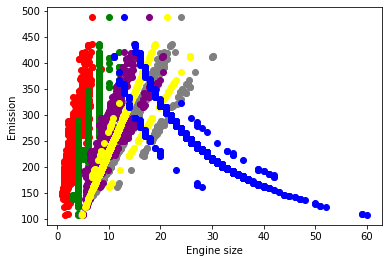

In [12]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='red')
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='green')
plt.scatter(cdf.FUELCONSUMPTION_CITY, cdf.CO2EMISSIONS,  color='grey')
plt.scatter(cdf.FUELCONSUMPTION_HWY, cdf.CO2EMISSIONS,  color='purple')
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='yellow')
plt.scatter(cdf.FUELCONSUMPTION_COMB_MPG, cdf.CO2EMISSIONS,  color='blue')
# plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='green')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# get the "engine size" as the independent variable (regressor)
X = cdf.drop('CO2EMISSIONS', axis=1)

# get the "emission" as the dependent variable
y = cdf['CO2EMISSIONS']

print(X)
print(y)



# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()

      MODELYEAR  ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  \
0          2014         2.0          4                   9.9   
1          2014         2.4          4                  11.2   
2          2014         1.5          4                   6.0   
3          2014         3.5          6                  12.7   
4          2014         3.5          6                  12.1   
...         ...         ...        ...                   ...   
1062       2014         3.0          6                  13.4   
1063       2014         3.2          6                  13.2   
1064       2014         3.0          6                  13.4   
1065       2014         3.2          6                  12.9   
1066       2014         3.2          6                  14.9   

      FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  
0                     6.7                   8.5                        33  
1                     7.7                   9.6                        29  
2  

In [8]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [9]:
# Predicting a new result
# y_pred = regressor.predict([[2014,1.3,6,10.0,8.6,4.9,90]])
y_pred = regressor.predict(X_test)
# y_pred = y_pred.reshape(-1, 1)
# y_pred = sc_y.inverse_transform(y_pred)
y_pred

array([353.47      , 209.44      , 230.04      , 212.68      ,
       182.38      , 292.        , 212.01      , 277.5       ,
       201.84      , 335.2       , 310.1       , 436.02      ,
       216.86      , 280.71      , 176.55      , 260.41      ,
       407.86      , 222.8       , 259.55      , 360.81      ,
       191.18      , 191.66      , 244.06      , 235.84      ,
       133.99      , 282.18      , 274.        , 294.24      ,
       246.64      , 117.        , 359.68      , 235.09      ,
       231.05      , 238.82      , 191.18      , 196.        ,
       294.15      , 221.02      , 225.9       , 238.34      ,
       185.08      , 183.9       , 201.84      , 170.71      ,
       296.92      , 198.        , 260.09      , 179.01      ,
       343.93      , 359.5       , 338.61      , 286.45      ,
       290.        , 133.99      , 230.        , 179.01      ,
       281.01      , 160.1175    , 258.        , 209.37      ,
       207.05      , 204.87      , 225.        , 294.24

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


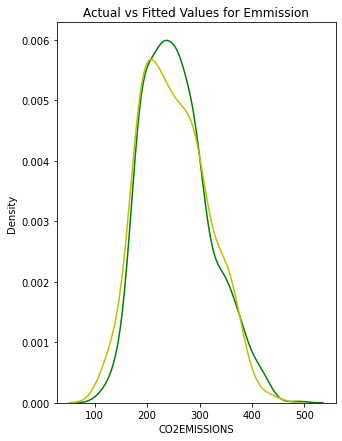

In [11]:
# Visualising the Random Forest Regression results (higher resolution) with scaling value
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="g", label="Actual Value")
sns.distplot(y_pred, hist=False, color="y", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Emmission')


plt.show()
plt.close()